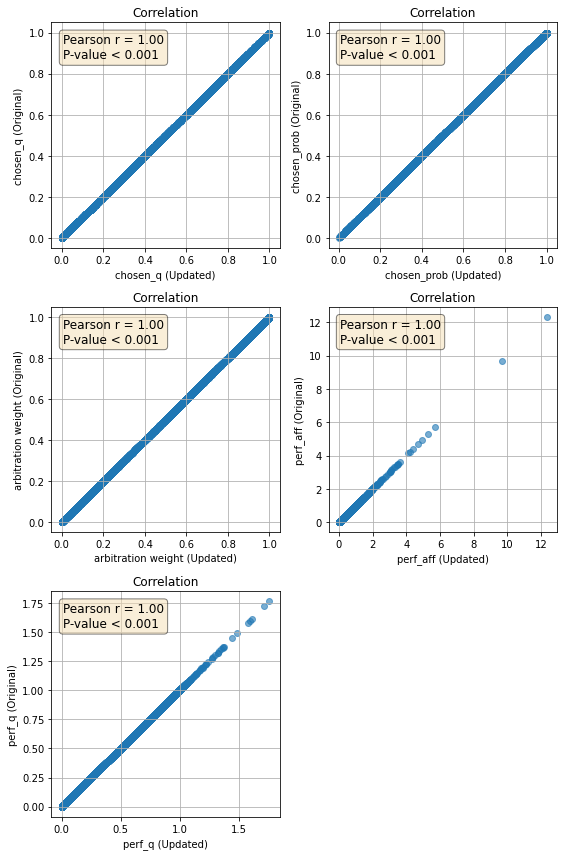

In [1]:
import json, math
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


model_based_var =json.load(open('../model_fitting/model_based_var/model_based_generated_var_RL_performance_2_avg_aff_score_precise_rt.json', 'r'))

model_based_var2 =json.load(open('../model_fitting/model_based_var/model_based_generated_var_RL_performance_avg_aff_score_precise_rt.json', 'r'))


subj_idx_lists = []
wc_lists = []
cong_resp_lists = []
rt_lists = []

def txt2code(txt):
    if txt == 'Pinch':
        return 1
    elif txt == 'Clench':
        return 2
    else:
        return 3

chosen_q_list = []
chosen_prob_list = []
wc_list = []
perf_aff_list = []
perf_q_list = []
chosen_q_list2 = []
chosen_prob_list2 = []
wc_list2 = []
perf_aff_list2 = []
perf_q_list2 = []

for i in range(len(model_based_var)):
    subj_i_data = model_based_var[i]
    chosen_q = subj_i_data['chosen_q']
    chosen_prob = subj_i_data['chosen_prob']
    wc = subj_i_data['wc_list']
    perf_aff = subj_i_data['xi_aff_list']
    perf_q = subj_i_data['xi_q_list']
    
    chosen_q_list += chosen_q
    chosen_prob_list += chosen_prob
    wc_list += wc
    perf_aff_list += perf_aff
    perf_q_list += perf_q
    
    subj_i_data2 = model_based_var2[i]
    chosen_q2 = subj_i_data2['chosen_q']
    chosen_prob2 = subj_i_data2['chosen_prob']
    wc2 = subj_i_data2['wc_list']
    perf_aff2 = subj_i_data2['xi_aff_list']
    perf_q2 = subj_i_data2['xi_q_list']
    
    chosen_q_list2 += chosen_q2
    chosen_prob_list2 += chosen_prob2
    wc_list2 += wc2
    perf_aff_list2 += perf_aff2
    perf_q_list2 += perf_q2
    
    
# Creating a dictionary to map variable names and data
variables = {
    "chosen_q": (chosen_q_list, chosen_q_list2),
    "chosen_prob": (chosen_prob_list, chosen_prob_list2),
    "arbitration weight": (wc_list, wc_list2),
    "perf_aff": (perf_aff_list, perf_aff_list2),
    "perf_q": (perf_q_list, perf_q_list2),
}

fig, axes = plt.subplots(3, 2, figsize=(8, 12))
axes = axes.flatten()  # Flatten the axes for easier indexing

from scipy.stats import pearsonr

# Generating correlation subplots for each variable
for i, (var_name, (data1, data2)) in enumerate(variables.items()):
    ax = axes[i]
    ax.scatter(data1, data2, alpha=0.6)
    ax.set_title(f"Correlation")
    ax.set_xlabel(f"{var_name} (Updated)")
    ax.set_ylabel(f"{var_name} (Original)")
    ax.grid(True)
    
    # Calculate Pearson correlation coefficient
    corr, p_value = pearsonr(data1, data2)
    p_text = f"P-value = {p_value:.2e}" if p_value >= 0.001 else "P-value < 0.001"
    ax.text(0.05, 0.95, f"Pearson r = {corr:.2f}\n{p_text}", 
            transform=ax.transAxes, fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))


# Remove unused subplot if there are fewer variables
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
